# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

city_name= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []

# Start the call counter 
count= 1

# Log file print statement
print(f"Beginning Data Retrieval!!!!")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(query_url+city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        record = response["name"]
        print(f"Processing Record {count} | {record}")
      
        # Increase counter by one 
        count += 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(.05)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
    
print(f"Data Retrieval Complete!!!!")
print(f"-------------------------------")


Beginning Data Retrieval!!!!
-------------------------------
Processing Record 1 | Saskylakh
Processing Record 2 | Atuona
Processing Record 3 | Paamiut
Processing Record 4 | Laguna
Processing Record 5 | Butaritari
Processing Record 6 | Saint-Philippe
Processing Record 7 | Troitsko-Pechorsk
Processing Record 8 | Porto Tolle
Processing Record 9 | Komsomolskiy
Processing Record 10 | Touros
Processing Record 11 | Punta Arenas
Processing Record 12 | Pittsburg
Processing Record 13 | Hermanus
Processing Record 14 | Hualmay
Processing Record 15 | Hamilton
Processing Record 16 | Namibe
Processing Record 17 | Pangody
Processing Record 18 | Okhotsk
Processing Record 19 | Albany
City not found. Skipping...
Processing Record 20 | Dingle
Processing Record 21 | Takoradi
Processing Record 22 | Mar del Plata
Processing Record 23 | Alofi
Processing Record 24 | Port Alfred
Processing Record 25 | Kodiak
Processing Record 26 | Hobart
Processing Record 27 | Cape Town
Processing Record 28 | Busselton
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
weather_pd = {"City": city_name,
              "Cloudiness":cloudiness,
             "Country":country,
             "Date":date,
             "Humidity": humidity,
             "Lat":lat,
             "Lng":lng,
             "Max_Temp":temp,
             "Wind_Speed":wind
             }

In [41]:
weather_data = pd.DataFrame(weather_pd)
weather_data.count()


City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max_Temp      565
Wind_Speed    565
dtype: int64

In [42]:

weather_data.to_csv('weather_data.csv')

weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Saskylakh,100,RU,1564369810,69,71.97,114.09,47.39,9.40
1,Atuona,0,PF,1564369811,77,-9.80,-139.03,80.51,21.81
2,Paamiut,0,GL,1564369812,92,61.99,-49.67,39.11,2.98
3,Laguna,90,BZ,1564369814,100,16.17,-88.94,73.40,2.55
4,Butaritari,100,KI,1564369820,67,3.07,172.79,85.19,7.23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

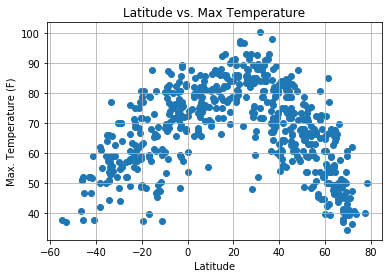

In [31]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max_Temp"])

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

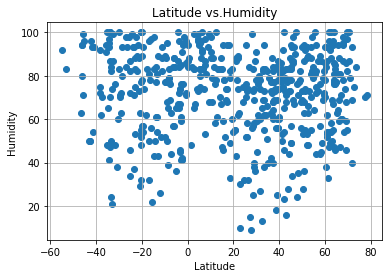

In [34]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

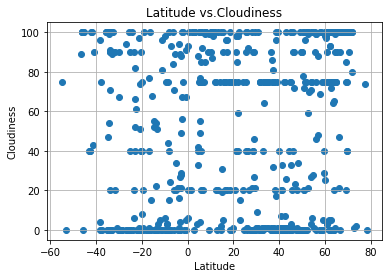

In [33]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude vs.Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

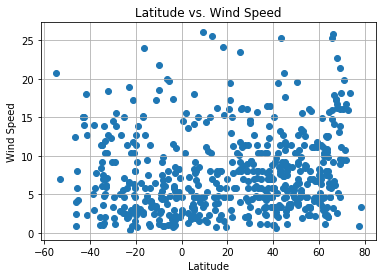

In [36]:
plt.scatter(weather_data["Lat"], weather_data["Wind_Speed"])

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()